In [ ]:
import pandas as pd
import sys
sys.path.append('./ex_fuzzy/')
sys.path.append('../ex_fuzzy/')

from sklearn import datasets
from sklearn.model_selection import train_test_split

import ex_fuzzy.fuzzy_sets as fs
import ex_fuzzy.evolutionary_fit as GA
import ex_fuzzy.utils as  utils
import ex_fuzzy.eval_tools as eval_tools

In [2]:
# Choose the parameters for the genetic algorithm
n_gen = 50
n_pop = 30

# Max number of rules and max number of antecedents per rule
nRules = 15
nAnts = 4

# Number of linguistic variables to use in the fuzzy variables
vl = 3

# Tolerance for the dominance score for each rule
tolerance = 0.01

# Type of dataset used
fz_type_studied = fs.FUZZY_SETS.t1 # Also t2, gt2

In [3]:
# Load the iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [4]:
# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [10]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def checkpoint_callback(generation, rule_base):
    y_pred = rule_base.winning_rule_predict(X_test.values, out_class_names=False)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Generation {generation+1}, test metrics - ACC: {accuracy}, F1: {f1}, PRECISION: {precision}, RECALL: {recall}')

In [11]:
# Compute the linguistic vatiables
precomputed_partitions = utils.construct_partitions(X, fz_type_studied)

# Create and fit the FRB classifier using a genetic algorithm
fl_classifier = GA.BaseFuzzyRulesClassifier(nRules=nRules, linguistic_variables=precomputed_partitions, nAnts=nAnts, 
                                            n_linguistic_variables=vl, fuzzy_type=fz_type_studied, verbose=False, tolerance=tolerance)
fl_classifier.fit(X_train, y_train, n_gen=n_gen, pop_size=n_pop, checkpoints=1, checkpoint_callback=checkpoint_callback)

Generation 1, test metrics - ACC: 0.68, F1: 0.6636132404181185, PRECISION: 0.6993833333333334, RECALL: 0.68
Generation 2, test metrics - ACC: 0.76, F1: 0.7607507331378299, PRECISION: 0.7905333333333334, RECALL: 0.76
Generation 3, test metrics - ACC: 0.76, F1: 0.7607507331378299, PRECISION: 0.7905333333333334, RECALL: 0.76
Generation 4, test metrics - ACC: 0.78, F1: 0.781947025217843, PRECISION: 0.8033939393939394, RECALL: 0.78
Generation 5, test metrics - ACC: 0.78, F1: 0.781947025217843, PRECISION: 0.8033939393939394, RECALL: 0.78
Generation 6, test metrics - ACC: 0.78, F1: 0.781947025217843, PRECISION: 0.8033939393939394, RECALL: 0.78
Generation 7, test metrics - ACC: 0.86, F1: 0.8577452048823017, PRECISION: 0.8587058823529412, RECALL: 0.86
Generation 8, test metrics - ACC: 0.92, F1: 0.9177205882352942, PRECISION: 0.9291503267973856, RECALL: 0.92
Generation 9, test metrics - ACC: 0.92, F1: 0.9177205882352942, PRECISION: 0.9291503267973856, RECALL: 0.92
Generation 10, test metrics - A

------------
ACCURACY
Train performance: 0.96
Test performance: 0.92
------------
MATTHEW CORRCOEF
Train performance: 0.9402838555857885
Test performance: 0.881361745306787
------------
Rules for consequent: 0
----------------
IF sepal length (cm) IS Low AND sepal width (cm) IS High WITH DS 0.04608888888888889, ACC 0.6666666666666666
IF sepal width (cm) IS High AND petal length (cm) IS Low WITH DS 0.06918055555555555, ACC 1.0
IF sepal length (cm) IS Low AND sepal width (cm) IS Medium WITH DS 0.03834444444444443, ACC 1.0

Rules for consequent: 1
----------------
IF sepal width (cm) IS Medium AND petal length (cm) IS Medium WITH DS 0.03335539215686272, ACC 1.0
IF sepal length (cm) IS Medium WITH DS 0.06236904761904763, ACC 0.9565217391304348

Rules for consequent: 2
----------------
IF petal width (cm) IS High WITH DS 0.11025, ACC 0.9444444444444444




C:\Users\Necro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ex_fuzzy\vis_rules.py:344: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Necro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ex_fuzzy\vis_rules.py:344: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Necro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ex_fuzzy\vis_rules.py:344: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Necro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ex_fuzzy\vis_rules.py:344: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
 

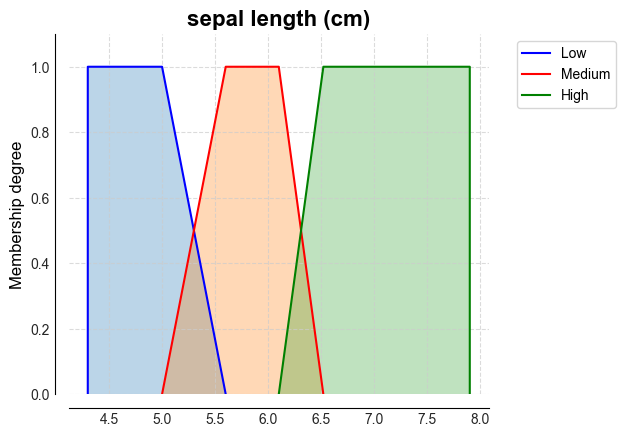

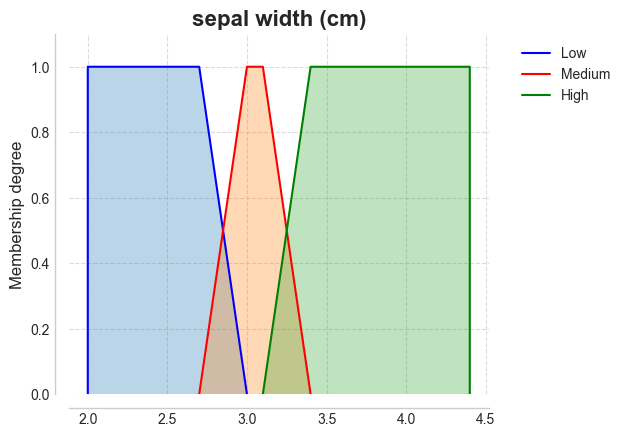

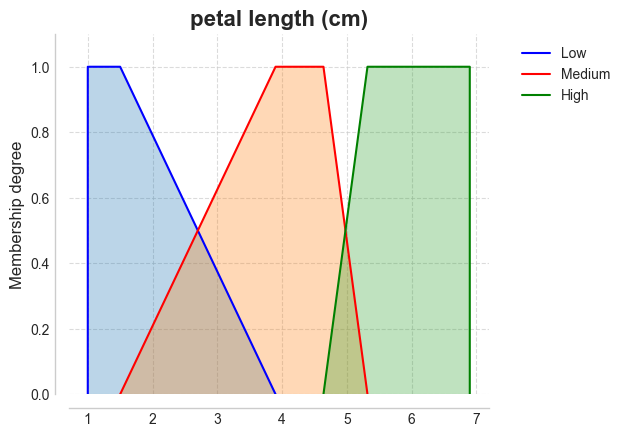

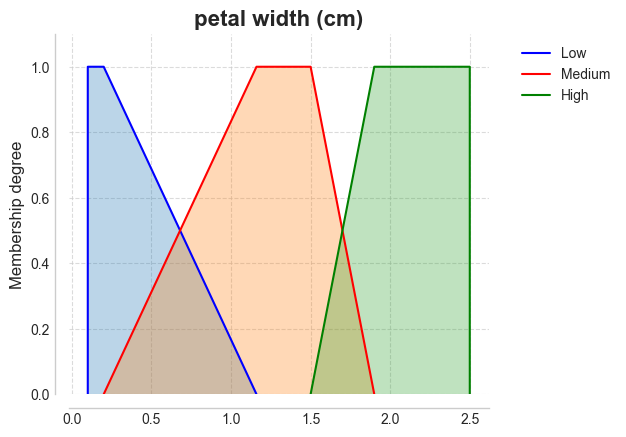

In [12]:
# Display the classifier performance and visualize the results
fuzzy_evaluator = eval_tools.FuzzyEvaluator(fl_classifier)
str_rules = fuzzy_evaluator.eval_fuzzy_model(X_train, y_train, X_test, y_test, 
                        plot_rules=False, print_rules=True, plot_partitions=True, return_rules=True)